# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 5s 0us/step


In [4]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [5]:
print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

print("Number of classes:", len(class_names))


print("Data type:", x_train.dtype)
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Training Data Shape: (50000, 32, 32, 3)
Testing Data Shape: (10000, 32, 32, 3)
Number of classes: 100
Data type: uint8
Min pixel value: 0
Max pixel value: 255


### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Normalize the images (convert pixel values to range [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)



In [7]:
# Split the training set into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Print shape to verify
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Training set shape: (40000, 32, 32, 3) (40000, 100)
Validation set shape: (10000, 32, 32, 3) (10000, 100)
Test set shape: (10000, 32, 32, 3) (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [8]:
model = tf.keras.models.Sequential()

# Convolutional Layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Flatten before Dense Layers
model.add(tf.keras.layers.Flatten())

# Fully Connected (Dense) Layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='softmax'))  # Correct output layer for 100 classes

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> CIFAR-100 is a multi-class classification problem. categorical_crossentropy is the standard loss function for multi-class classification when labels are one-hot encoded.
- <b>Optimizer:</b> Adam combines the benefits of SGD with momentum and RMSProp, making it faster and more stable. It automatically adjusts learning rates for each parameter, reducing the need for manual tuning.

In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [10]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 27s 21ms/step - loss: 4.0116 - accuracy: 0.0844 - val_loss: 3.5817 - val_accuracy: 0.1473
Epoch 2/10
1250/1250 [==============================] - 27s 21ms/step - loss: 3.3410 - accuracy: 0.1942 - val_loss: 3.2296 - val_accuracy: 0.2175
Epoch 3/10
1250/1250 [==============================] - 26s 21ms/step - loss: 3.0303 - accuracy: 0.2515 - val_loss: 3.0620 - val_accuracy: 0.2505
Epoch 4/10
1250/1250 [==============================] - 27s 21ms/step - loss: 2.8284 - accuracy: 0.2915 - val_loss: 2.8735 - val_accuracy: 0.2914
Epoch 5/10
1250/1250 [==============================] - 26s 21ms/step - loss: 2.6660 - accuracy: 0.3241 - val_loss: 2.8373 - val_accuracy: 0.2952
Epoch 6/10
1250/1250 [==============================] - 26s 21ms/step - loss: 2.5426 - accuracy: 0.3489 - val_loss: 2.7310 - val_accuracy: 0.3245
Epoch 7/10
1250/1250 [==============================] - 26s 21ms/step - loss: 2.4267 - accuracy: 0.3730 - val_loss: 2.7237 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.3465
- <b>Other metric:</b> Loss
- <b>Reason for selection:</b> Loss measures how well the model's predictions match the actual labels. Unlike accuracy, which only considers correct vs. incorrect predictions, loss takes into account how confident the model is in its predictions. A lower loss means the model is making better predictions overall.  
- <b>Value of metric:</b> 2.6376
- <b>Interpretation of metric value:</b> A lower loss is ideal because it means the model's predictions are closer to the true values. In this case, the loss is still relatively high, indicating that the model might need more training or better tuning of hyperparameters like learning rate or Dropout.

In [ ]:
# Your Code Here
history.model.evaluate(x_test, y_test) 


313/313 [==============================] - 2s 8ms/step - loss: 2.6377 - accuracy: 0.3465


[2.637657403945923, 0.3465000092983246]

In [ ]:
# print training accuracy
print("Accuracy:", history.history['accuracy'][-1]) 

# print training loss
print("Loss:", history.history['loss'][-1])

Accuracy: 0.4267500042915344
Loss: 2.1654436588287354


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

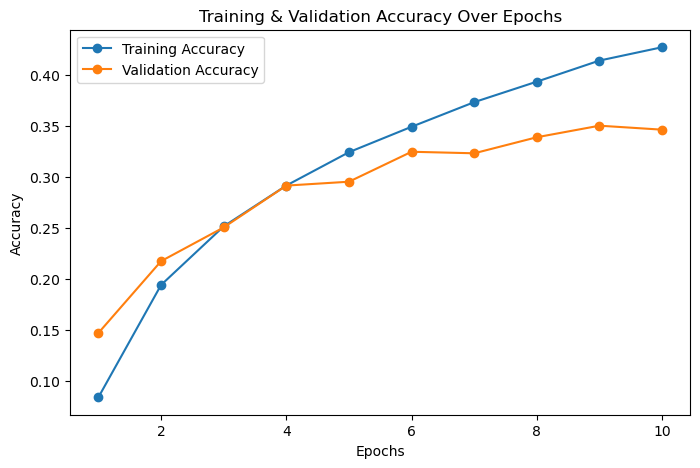

In [14]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from training history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy Over Epochs')
plt.legend()
plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [15]:
model = tf.keras.models.Sequential()

# Convolutional Layers with Dropout
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Flatten before Dense Layers
model.add(tf.keras.layers.Flatten())

# Fully Connected (Dense) Layers with Dropout
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100, activation='softmax'))

# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_enhanced = model.fit(
    x_train, y_train,
    epochs=10, batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/10
1250/1250 [==============================] - 30s 23ms/step - loss: 4.2919 - accuracy: 0.0422 - val_loss: 4.0167 - val_accuracy: 0.0822
Epoch 2/10
1250/1250 [==============================] - 29s 23ms/step - loss: 3.9093 - accuracy: 0.0936 - val_loss: 3.6804 - val_accuracy: 0.1389
Epoch 3/10
1250/1250 [==============================] - 28s 23ms/step - loss: 3.6847 - accuracy: 0.1298 - val_loss: 3.5216 - val_accuracy: 0.1698
Epoch 4/10
1250/1250 [==============================] - 28s 23ms/step - loss: 3.5259 - accuracy: 0.1579 - val_loss: 3.2803 - val_accuracy: 0.2101
Epoch 5/10
1250/1250 [==============================] - 28s 23ms/step - loss: 3.4296 - accuracy: 0.1777 - val_loss: 3.2509 - val_accuracy: 0.2270
Epoch 6/10
1250/1250 [==============================] - 28s 23ms/step - loss: 3.3276 - accuracy: 0.1927 - val_loss: 3.0889 - val_accuracy: 0.2505
Epoch 7/10
1250/1250 [==============================] - 28s 23ms/step - loss: 3.2623 - accuracy: 0.2057 - val_loss: 3.0290 -

In [17]:
# Evaluate enhanced model
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print(f"Enhanced Model Test Accuracy: {test_acc:.4f}")
print(f"Enhanced Model Test Loss: {test_loss:.4f}")

313/313 [==============================] - 2s 8ms/step - loss: 2.8634 - accuracy: 0.2955
Enhanced Model Test Accuracy: 0.2955
Enhanced Model Test Loss: 2.8634


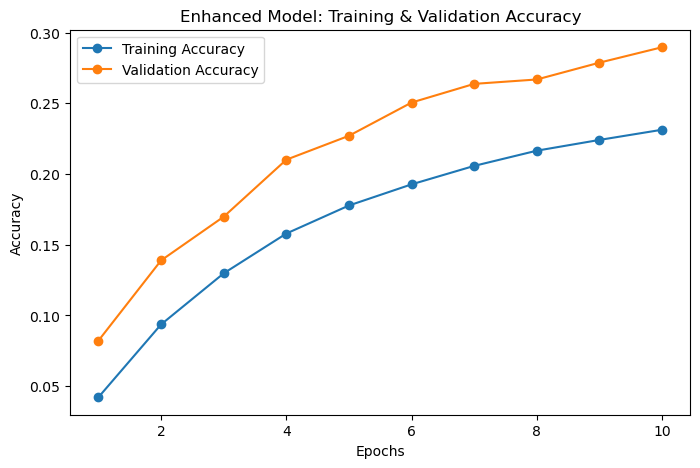

In [19]:
# Extract accuracy values
epochs = range(1, len(history_enhanced.history['accuracy']) + 1)
train_acc = history_enhanced.history['accuracy']
val_acc = history_enhanced.history['val_accuracy']

# Plot accuracy curves
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Enhanced Model: Training & Validation Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 2s 6ms/step


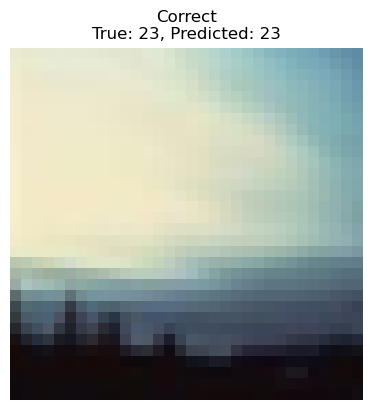

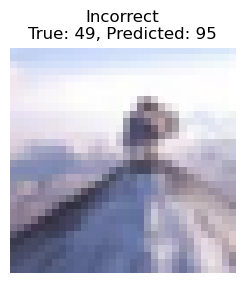

In [20]:
import numpy as np

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Find correct and incorrect classifications
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]

# Function to plot results
def plot_prediction(idx, correct=True):
    plt.imshow(x_test[idx])
    plt.axis('off')
    predicted_label = y_pred_classes[idx]
    true_label = y_true_classes[idx]
    title = f"Correct\nTrue: {true_label}, Predicted: {predicted_label}" if correct else \
            f"Incorrect\nTrue: {true_label}, Predicted: {predicted_label}"
    plt.title(title)
    plt.show()

# Show images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_prediction(correct_idx, correct=True)
plt.subplot(1, 2, 2)
plot_prediction(incorrect_idx, correct=False)

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

- After adding Dropout, the model showed slightly worse performance on the validation set and a noticeable drop in training accuracy. But that's helped successfully prevent overfitting - training and validation accuracy are now much better. In my opinion, this outcome is better because the model's learning dynamics are correct. Instead of memorizing the training data, it is generalizing better to unseen examples. Additionally, we can further improve performance by increasing the number of training epochs, allowing the model to learn more while maintaining good generalization.

- Model's performance didn't improve.

- This happened because Dropout randomly turns off some neurons during training, preventing the model from relying too much on specific features. As a result, it learns more useful patterns instead of memorizing the training data.

- I also used the Adam optimizer with a learning rate of 0.001, which helped the model train efficiently. A lower or adaptive learning rate could be tested to see if it improves results further.

- There is still room for improvement. We could try adjusting the Dropout rate to find the best balance or test different learning rates. Adding more training epochs might also help if the model is still learning.

- In the future, I would experiment with learning rate adjustments or different Dropout values to further improve accuracy.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.